In [1]:
import psycopg2
import pandas as pd

conn = psycopg2.connect(dbname='dalledb', user='machine', password='learning', host='localhost', port='5432')
df = pd.read_sql('SELECT * FROM prompts', conn)
conn.close()

df.set_index('timestamp', inplace=True)
df

C:\Users\cseke\AppData\Local\Temp\ipykernel_38996\2762039481.py:5: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql('SELECT * FROM prompts', conn)


,raw_prompt,translated_prompt,translated_language,seed,nsfw_text,nsfw_image
timestamp,,,,,,
2022-10-02 13:15:59.712081,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 13:19:21.467033,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 13:45:21.288761,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 13:46:19.586496,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 13:51:54.835504,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 13:55:06.815124,ads,ads,EN,1024,False,None
2022-10-02 13:59:36.002293,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 16:33:00.436710,a busy street in a cyberpunk metropolis,a busy street in a cyberpunk metropolis,EN,1024,False,None
2022-10-02 16:33:38.092349,"a busy street in a cyberpunk metropolis, artst...","a busy street in a cyberpunk metropolis, artst...",EN,1024,False,None


In [41]:
# delete something
conn = psycopg2.connect(dbname='dalledb', user='machine', password='learning', host='localhost', port='5432')
with conn.cursor() as cur:
    cur.execute("DELETE FROM prompts WHERE raw_prompt='a';")
conn.commit()
conn.close()

<AxesSubplot: xlabel='timestamp'>

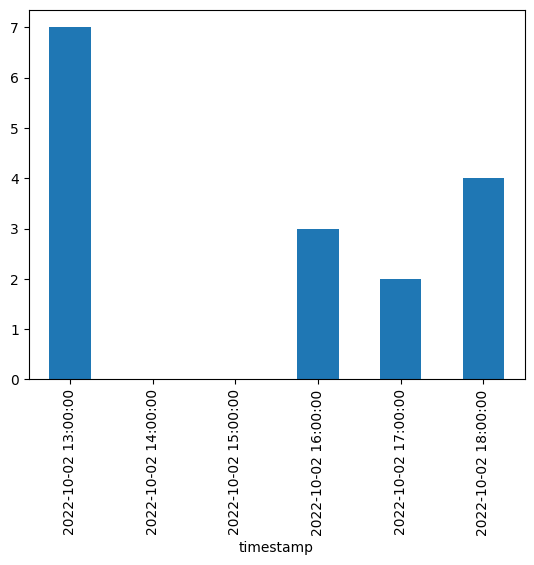

In [2]:
# per-hour usage
df.resample('h').size().plot.bar()

<AxesSubplot: ylabel='translated_language'>

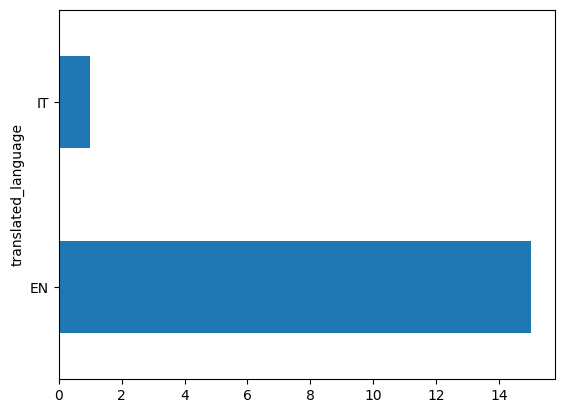

In [3]:
# language overview
df2 = df.groupby('translated_language')['seed'].count()
df2.plot.barh()

,raw_prompt,translated_prompt,translated_language,seed,nsfw_text,nsfw_image
timestamp,,,,,,
2022-10-02 18:00:32.363239,boobs are nsfw,boobs are nsfw,EN,1024,True,None
2022-10-02 18:02:02.106017,boobs are nsfw,boobs are nsfw,EN,1024,True,None


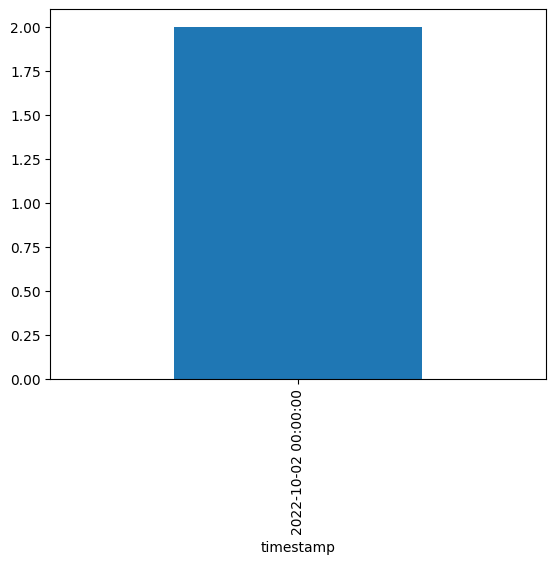

In [4]:
# nsfw overview
df[df.nsfw_text == True].resample('D').size().plot.bar()
df[df.nsfw_text == True]